# 1. Checagem dos dados

#### Objetivo do Case | Expansão de uma rede de laboratórios
*Apresentar uma análise exploratória dos dados de uma rede de medicina diagnóstica para definir caminhos de abordagem  que auxiliem a área de negócios da empresa a ter insumos iniciais para suportar seu plano de expansão.*

Este script inicial tem como objetivo realizar checagens nas bases de dados fornecidas para a execução do case
Ao longo das checagens, conforme as anomalias que forem encontradas, será realizada a sanitização dos dados, como a remoção de linhas duplicadas e a padronização do formato e dos nomes das colunas que relacionam uma base com a outras

Ao final do tratamento, as bases tratadas serão salvas na pasta dados_tratados



### importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### lendo as bases de dados

In [2]:
demographic_data = pd.read_csv('dados_brutos/DemographicData_ZCTAs.csv', index_col = 0)
df_geocode = pd.read_csv('dados_brutos/df_geocode.csv', index_col = 0)
economic_data = pd.read_csv('dados_brutos/EconomicData_ZCTAs.csv', index_col = 0)
test_data = pd.read_csv('dados_brutos/test_data.csv')
transactional_data = pd.read_csv('dados_brutos/transactional_data.csv', sep = ';')

### qual o número de linhas e de colunas de cada base?

In [3]:
pd.DataFrame({
    'base': ['demographic_data', 'df_geocode', 'economic_data', 'test_data', 'transactional_data'],
    'n_colunas': [len(demographic_data.columns), len(df_geocode.columns), len(economic_data.columns), len(test_data.columns), len(transactional_data.columns)],
    'n_linhas': [len(demographic_data), len(df_geocode), len(economic_data), len(test_data), len(transactional_data)]
})

,base,n_colunas,n_linhas
0,demographic_data,18,33120
1,df_geocode,4,119
2,economic_data,12,629280
3,test_data,6,2002
4,transactional_data,8,2355241


### verificando as primeiras linhas de cada dataframe

1. demographic_data

In [4]:
# dados demográficos relevantes a nível de ZCTA (zip code tabulation area)
demographic_data.head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


2. df_geocode

In [5]:
# informações a respeito da localização de cada laboratório, como endereço, lat-long e ZCTA (zipcode) no qual o laboratório se encontra
df_geocode.head()

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


3. economic_data

In [6]:
# dados econômicos relevantes a nível de ZCTAs
economic_data.head()

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [7]:
# a coluna "id" está em minúsculo, e a "Geographic Area Name" está com as palavras separadas.
# é importante alterar os nomes para ficarem exatamente iguais aos nomes dessas respectivas colunas no dataframe demographic_data

economic_data = economic_data.rename({'id':'Id', 'Geographic Area Name':'GeographicAreaName'}, axis = 1)
economic_data.head()

,Id,GeographicAreaName,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


4. test_data

In [8]:
# informações a respeito dos exames, características como custo de aplicação e outras especificidades técnicas
test_data.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


5. transactional_data

In [9]:
# registros de exames feitos por pacientes da rede em cada laboratório
transactional_data.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


### há linhas duplicadas em cada dataframe?

In [10]:
print('n_dup_demographic_data =', demographic_data.duplicated().sum())
print('n_dup_df_geocode =', df_geocode.duplicated().sum())
print('n_dup_economic_data =', economic_data.duplicated().sum())
print('n_dup_test_data =', test_data.duplicated().sum())
print('n_dup_transactional_data =', transactional_data.duplicated().sum())

n_dup_demographic_data = 0
n_dup_df_geocode = 0
n_dup_economic_data = 596160
n_dup_test_data = 0
n_dup_transactional_data = 14519


os dataframes **economic_data** e **transactional_data** possuem linhas duplicadas. é interessante removê-las antes de prosseguir com as checagens

In [11]:
economic_data1 = economic_data.drop_duplicates()
transactional_data1 = transactional_data.drop_duplicates()

# verificar se as linhas foram removidas
print(len(economic_data), len(transactional_data))

33120 2340722


### há missings nos dataframes?
verificar se há valores vazios em cada base

<Axes: >

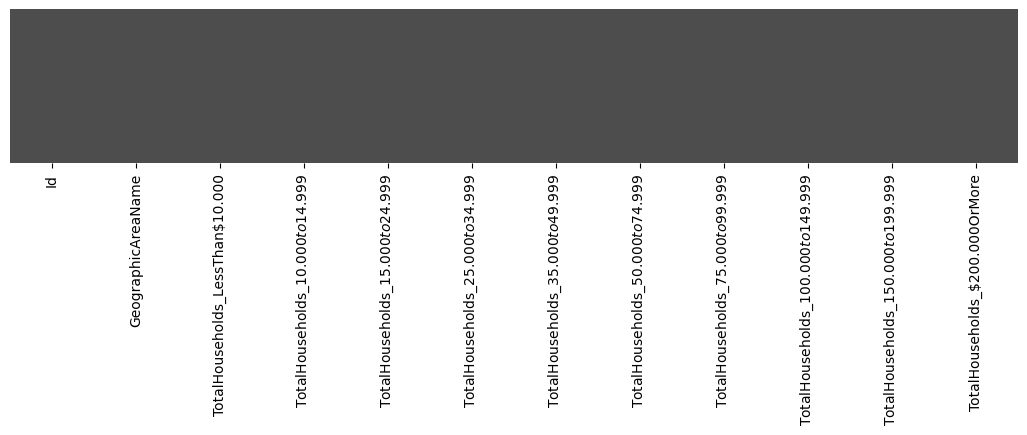

In [12]:
# economic data

plt.figure(figsize = (13,2))
sns.heatmap(economic_data.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

<Axes: >

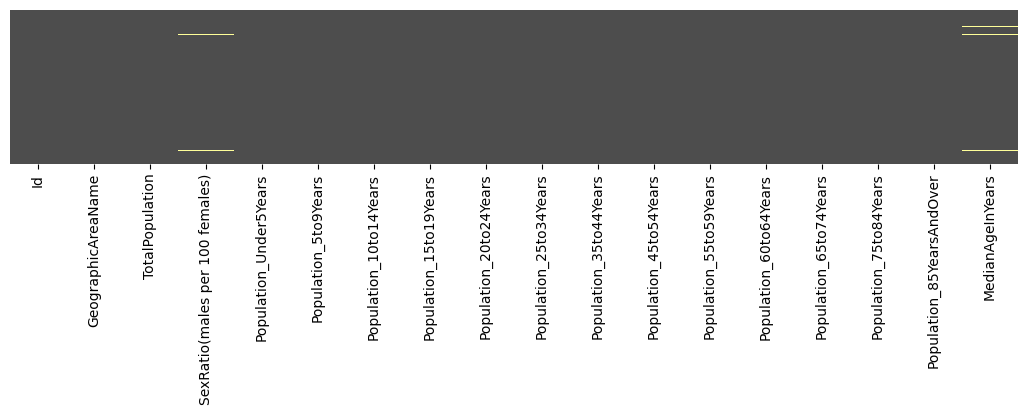

In [13]:
# demographic data

plt.figure(figsize = (13,2))
sns.heatmap(demographic_data.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

<Axes: >

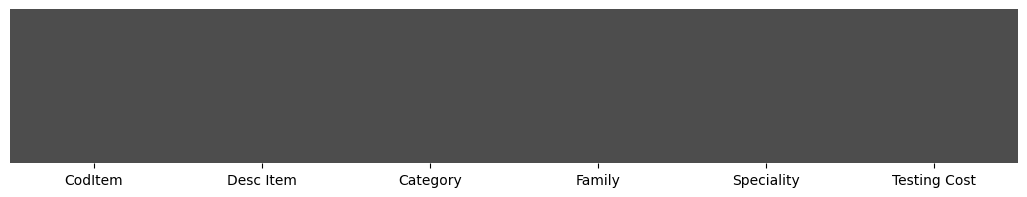

In [14]:
# test data

plt.figure(figsize = (13,2))
sns.heatmap(test_data.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

<Axes: >

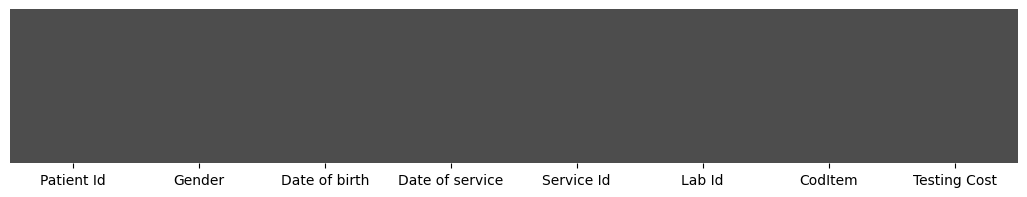

In [15]:
# transactional data

plt.figure(figsize = (13,2))
sns.heatmap(transactional_data.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

<Axes: >

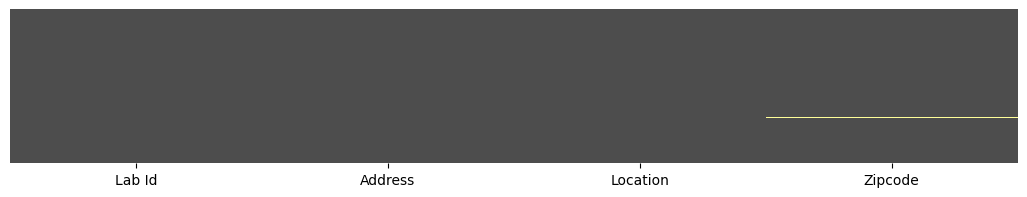

In [16]:
# df geocode

plt.figure(figsize = (13,2))
sns.heatmap(df_geocode.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

há alguns missings nas bases demographic_data e df_geocode. investigar quais são esses missings

#### base demographic_data

número de linhas com missings = 617
Axes(0.125,0.11;0.775x0.77)


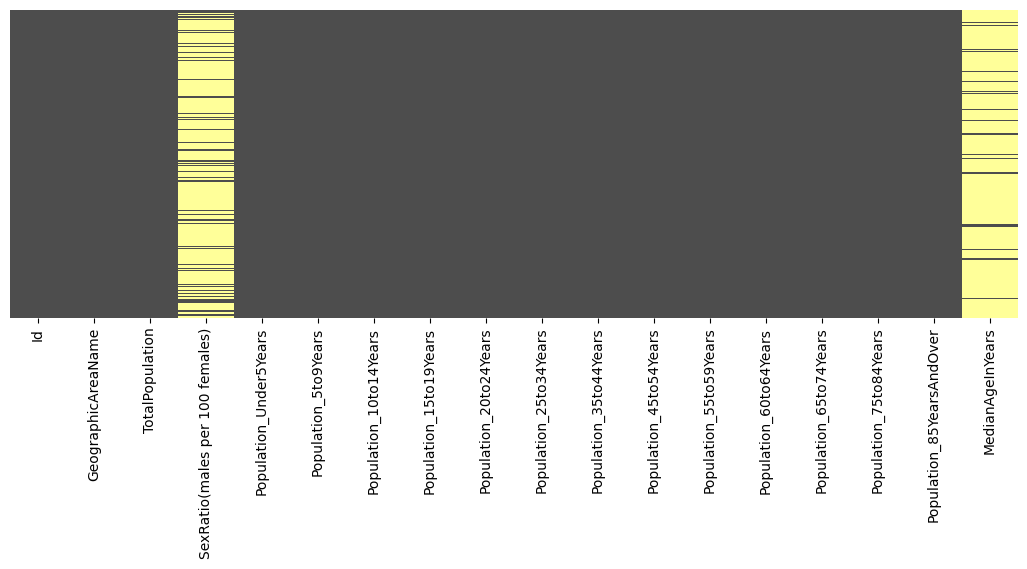

In [25]:
# seleciona apenas as colunas que contêm valores nulos
null_demographic_data = demographic_data.columns[demographic_data.isnull().any()].tolist()

# filtra o DataFrame original para exibir apenas as linhas que contêm valores nulos
null_demographic_data = demographic_data[demographic_data[null_demographic_data].isnull().any(axis = 1)]

print('número de linhas com missings =', len(null_demographic_data))

plt.figure(figsize = (13,4))
print(sns.heatmap(null_demographic_data.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99']))

In [36]:
# percentual de missings de cada coluna

print('% missings sex ratio =', round(len(demographic_data[demographic_data['SexRatio(males per 100 females)'].isnull()]) * 100 / len(demographic_data), 2), '%')

print('% missings median age =', round(len(demographic_data[demographic_data['MedianAgeInYears'].isnull()]) * 100 / len(demographic_data), 2), '%')

% missings sex ratio = 1.51 %
% missings median age = 1.72 %


In [37]:
# como estão as linhas que tem estes valores nulos?
null_demographic_data

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
5,8600000US35013,ZCTA5 35013,46,NaN,0,0,0,0,0,0,15,31,0,0,0,0,0,47.9
42,8600000US35074,ZCTA5 35074,99,86.8,0,0,0,0,0,99,0,0,0,0,0,0,0,NaN
47,8600000US35082,ZCTA5 35082,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
97,8600000US35187,ZCTA5 35187,6,100.0,0,0,0,0,0,0,0,0,0,0,6,0,0,NaN
142,8600000US35457,ZCTA5 35457,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32944,8600000US82845,ZCTA5 82845,28,86.7,0,0,0,0,0,0,0,0,0,15,13,0,0,NaN
32955,8600000US82936,ZCTA5 82936,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
32981,8600000US83121,ZCTA5 83121,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
33099,8600000US00950,ZCTA5 00950,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [46]:
# aparentemente são áreas que possuem uma população bem baixa. verificar as populações da maior para a menor

null_demographic_data.sort_values('TotalPopulation', ascending = False).head(10)

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
1084,8600000US85608,ZCTA5 85608,4671,NaN,0,0,0,91,519,1775,1532,598,86,19,51,0,0,34.7
4918,8600000US32831,ZCTA5 32831,3228,NaN,0,0,0,104,298,986,877,583,227,78,67,8,0,37.5
12544,8600000US21746,ZCTA5 21746,3008,NaN,0,0,0,21,458,1032,688,496,151,105,48,9,0,34.9
12614,8600000US21890,ZCTA5 21890,2816,NaN,0,0,0,57,253,1054,596,510,145,89,92,20,0,35.6
22569,8600000US44901,ZCTA5 44901,2627,NaN,0,0,0,6,397,1065,680,356,51,56,16,0,0,33.2
30405,8600000US23891,ZCTA5 23891,2112,NaN,0,0,0,6,190,776,628,288,124,56,44,0,0,36.2
4573,8600000US32026,ZCTA5 32026,2002,NaN,0,0,0,18,130,845,550,325,64,21,49,0,0,35.1
19837,8600000US13024,ZCTA5 13024,1709,NaN,0,0,0,8,111,530,477,346,130,63,44,0,0,39.0
28014,8600000US76596,ZCTA5 76596,1250,NaN,0,0,0,6,72,405,402,221,67,66,11,0,0,38.5
32466,8600000US54307,ZCTA5 54307,1173,NaN,0,0,0,0,156,516,287,124,0,54,36,0,0,34.1


In [43]:
# quais as áreas com maior população da base completa?

demographic_data.sort_values('TotalPopulation', ascending = False).head()

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
28338,8600000US77449,ZCTA5 77449,128294,91.5,10192,11515,12289,9307,7946,19072,21261,17449,6077,4968,5201,2472,545,31.7
28375,8600000US77494,ZCTA5 77494,118291,93.7,8929,11394,12285,9231,4660,12132,23166,18058,5118,3877,5896,2616,929,35.2
19135,8600000US11368,ZCTA5 11368,112088,109.4,10107,8092,7766,6583,7271,20276,18627,13408,5156,4624,5431,3303,1444,32.9
29291,8600000US79936,ZCTA5 79936,111620,96.3,6549,7949,8723,9619,10210,16817,13111,14345,7094,5613,7372,3011,1207,31.8
1885,8600000US90011,ZCTA5 90011,111165,102.3,9263,10092,10008,9204,9565,18049,15873,13603,4566,3939,4359,2044,600,28.7


pelo fato das populações serem pequenas em relação às áreas de maior população da base demographics_data, é justificável que não tenha as informações de sex ratio (pode ser que nessas regiões não tenham homens ou tenham poucos) e de mediana de idade. 

no caso dos dados sex ratio, não teria como fazer uma estimativa para substituir estes valores vazios, então caso este dado seja usado em alguma análise, não seria possível obter esta informação para estes zip codes, então estes seriam descartados.

no caso da mediana de idade, como temos a população por faixa etária, seria possível fazer uma estimativa fazendo uma média ponderada com os valores de cada faixa etária.

#### base df_geocode

número de linhas com missings = 1
Axes(0.125,0.11;0.775x0.77)


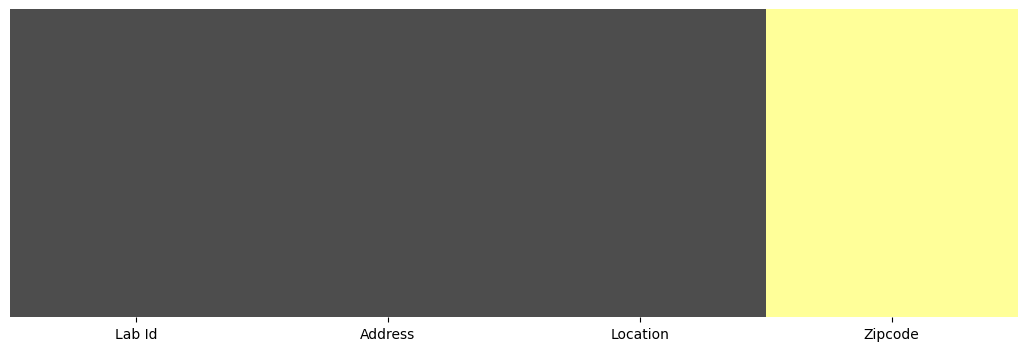

In [23]:
# selecionar apenas as colunas que contém valores nulos
null_df_geocode = df_geocode.columns[df_geocode.isnull().any()].tolist()

# filtra o dataframe original para exibir apenas as linhas que contém valores nulos
null_df_geocode = df_geocode[df_geocode[null_df_geocode].isnull().any(axis = 1)]

print('número de linhas com missings =', len(null_df_geocode))

plt.figure(figsize = (13,4))
print(sns.heatmap(null_df_geocode.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99']))

In [26]:
# qual linha está vazia?

df_geocode[df_geocode['Zipcode'].isnull()]

,Lab Id,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


n linhas df_geocode = 118
Axes(0.125,0.11;0.775x0.77)


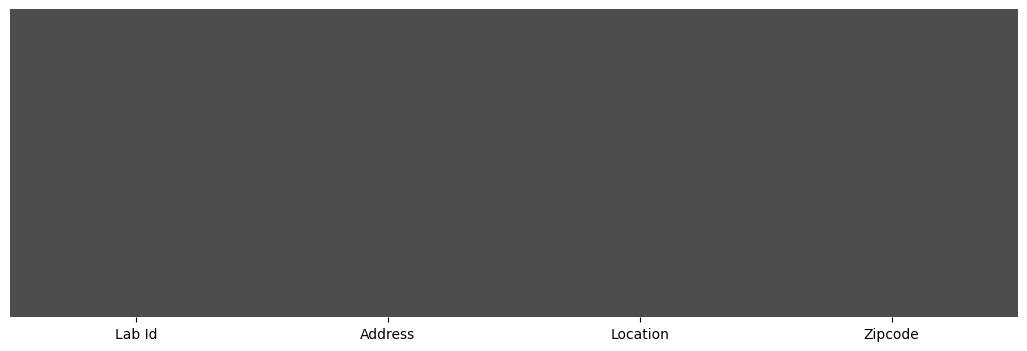

In [31]:
# aparentemente é um erro de registro. remover esta linha

df_geocode = df_geocode.dropna(subset = 'Zipcode')

# confirmando a remoção 

print('n linhas df_geocode =', len(df_geocode))

plt.figure(figsize = (13,4))
print(sns.heatmap(df_geocode.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99']))

### verificar novamente o número de linhas e de colunas de cada base

In [47]:
pd.DataFrame({
    'base': ['demographic_data', 'df_geocode', 'economic_data', 'test_data', 'transactional_data'],
    'n_colunas': [len(demographic_data.columns), len(df_geocode.columns), len(economic_data.columns), len(test_data.columns), len(transactional_data.columns)],
    'n_linhas': [len(demographic_data), len(df_geocode), len(economic_data), len(test_data), len(transactional_data)]
})

,base,n_colunas,n_linhas
0,demographic_data,18,33120
1,df_geocode,4,118
2,economic_data,12,33120
3,test_data,6,2002
4,transactional_data,8,2340722


### mapeamento das colunas que relacionam as bases disponíveis

criando um dataframe com a lista de colunas de cada base

In [48]:
df1 = demographic_data.columns.tolist()
df1 = pd.DataFrame(df1, columns = ['columns'])
df1['1_demographic_data'] = 'x'

df2 = df_geocode.columns.tolist()
df2 = pd.DataFrame(df2, columns = ['columns'])
df2['2_df_geocode'] = 'x'

df3 = economic_data.columns.tolist()
df3 = pd.DataFrame(df3, columns = ['columns'])
df3['3_economic_data'] = 'x'

df4 = test_data.columns.tolist()
df4 = pd.DataFrame(df4, columns = ['columns'])
df4['4_test_data'] = 'x'

df5 = transactional_data.columns.tolist()
df5 = pd.DataFrame(df5, columns = ['columns'])
df5['5_transactional_data'] = 'x'

# exemplo de como fica o dataframe com a lista de colunas para cada base:
df2

,columns,2_df_geocode
0,Lab Id,x
1,Address,x
2,Location,x
3,Zipcode,x


juntando todas as listas criadas para verificar as colunas em comum

In [49]:
merged = df1.merge(df2, how = 'outer').merge(df3, how = 'outer').merge(df4, how = 'outer').merge(df5, how = 'outer')
merged

,columns,1_demographic_data,2_df_geocode,3_economic_data,4_test_data,5_transactional_data
0,Id,x,NaN,x,NaN,NaN
1,GeographicAreaName,x,NaN,x,NaN,NaN
2,TotalPopulation,x,NaN,NaN,NaN,NaN
3,SexRatio(males per 100 females),x,NaN,NaN,NaN,NaN
4,Population_Under5Years,x,NaN,NaN,NaN,NaN
5,Population_5to9Years,x,NaN,NaN,NaN,NaN
6,Population_10to14Years,x,NaN,NaN,NaN,NaN
7,Population_15to19Years,x,NaN,NaN,NaN,NaN
8,Population_20to24Years,x,NaN,NaN,NaN,NaN
9,Population_25to34Years,x,NaN,NaN,NaN,NaN


filtrando apenas as colunas que aparecem em pelo menos 2 bases

In [50]:
merged['n_dfs'] = merged.count(axis = 1) - 1 # conta os número de colunas com valores não-nulos, subtraindo a coluna dos nomes
merged[merged['n_dfs'] >= 2] # filtra apenas os nomes de colunas que aparecem em pelo menos 2 bases

,columns,1_demographic_data,2_df_geocode,3_economic_data,4_test_data,5_transactional_data,n_dfs
0,Id,x,NaN,x,NaN,NaN,2
1,GeographicAreaName,x,NaN,x,NaN,NaN,2
18,Lab Id,NaN,x,NaN,NaN,x,2
32,CodItem,NaN,NaN,NaN,x,x,2
37,Testing Cost,NaN,NaN,NaN,x,x,2


Observando o dataframe acima, é possível perceber que as bases **test_data** e **transactional_data** possuem 2 colunas em comum. 

Além disso, as bases **demographic_data** e **economic_data** também possuem 2 colunas em comum.

É importante investigar se essas duas colunas são correspondentes

### investigando as duas colunas em comum das bases test_data e transactional_data

In [52]:
test_data[['CodItem', 'Testing Cost']].head(10).sort_values(by = 'CodItem')

,CodItem,Testing Cost
3,70000103,0.80
9,70000168,2.38
4,70000224,1.02
8,70000392,1.43
1,70000638,2.46
6,70001206,2.20
2,70001597,2.11
5,70002653,1.29
0,70003237,1.78
7,70005903,2.20


In [53]:
transactional_data[['CodItem', 'Testing Cost']].head(10).sort_values(by = 'CodItem')

,CodItem,Testing Cost
3,70000103,"11,0"
9,70000168,"48,0"
4,70000224,"10,0"
8,70000392,"8,0"
1,70000638,"13,0"
6,70001206,"41,0"
2,70001597,"49,0"
5,70002653,"8,0"
0,70003237,"9,0"
7,70005903,"57,0"


os valores de testing cost estão diferentes para cada coditem em cada dataframe. na amostra observada, test_data, os valores de cada teste são sempre mais baixos

assim, é possível concluir que o testing cost no dataframe test_data é relativo ao custo do teste para a empresa, e no dataframe transactional_data é relativo ao valor que o cliente pagou pelo teste

é importante conferir se há valores duplicados na base test_data; se for o caso, há testes com mais de um valor

é importante também verificar se na base transactional_data há códigos de testes que não existem na base test_data, indicando que foram realizados testes que não tem seus valores tabelados

In [54]:
# contar o número de ocorrências de cada código na coluna CodItem da base test_data
n_cod = test_data['CodItem'].value_counts()

n_cod.head()

70004701    2
70003237    1
70004880    1
70005992    1
70004977    1
Name: CodItem, dtype: int64

In [55]:
# filtrar os códigos que aparecem mais de uma vez
test_data[test_data['CodItem'] == n_cod[n_cod > 1].index.tolist()[0]]

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1208,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96
1968,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96


aparentemente todas as informações deste teste estão duplicadas em todas as colunas

para fazer um double check, é possível confirmar que o Desc Item das colunas duplicadas não está escrito diferente em cada observação

In [56]:
test_data[test_data['CodItem'] == 70004701]['Desc Item'].tolist()

['PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOISTOQUIMICA (DUAS A CINCO REACOES)',
 'PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOISTOQUIMICA (DUAS A CINCO REACOES)']

as linhas estão de fato duplicadas. sendo assim, podemos remover a segunda observação

In [84]:
test_data2 = test_data.drop_duplicates(subset = 'CodItem')

# confirmando a remoção da linha duplicada
print('n linhas:', len(test_data2))

n linhas: 2001
<class 'pandas.core.frame.DataFrame'>


tem algum duplicado na coluna Desc Item?

In [85]:
n_cod = test_data['Desc Item'].value_counts()
test_data[test_data['Desc Item'] == n_cod[n_cod > 1].index.tolist()[0]]

,index,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1126,1126,70001703,ANGIO-TC AORTA TORACICA,RID,CT SCAN,VASCULAR,367.67
1595,1595,70002668,ANGIO-TC AORTA TORACICA,RID,CT SCAN,VASCULAR,212.76


tem dois itens com códigos diferentes e preços diferente, mas com os outros parâmetros iguais. por isso, é melhor manter ambos os itens para garantir que as informações de ambos os códigos, caso apareçam na base transactional_data, seja retornada.

agora, é importante ver se todos os testes presentes na base transactional_data estão tabelados na test_data

In [62]:
test_data.head()

0    70003237
1    70000638
2    70001597
3    70000103
4    70000224
Name: CodItem, dtype: int64

In [61]:
# fazer lista com todos os códigos que aparecem na base transactional_data
cod_unicos_transact = transactional_data['CodItem'].unique().tolist()

# colocar em um dataframe
cod_unicos_transact = pd.DataFrame({'CodItem': cod_unicos_transact})

cod_unicos_transact

# verificar se todos estes códigos aparecem na base teste_data
# cod_unicos_transact = cod_unicos_transact.merge(test_data[['CodItem', 'Desc Item']], how = 'left')

# filtrar apenas as linhas que estão sem desc_item
# sem_desc = cod_unicos_transact[cod_unicos_transact['Desc Item'].isnull()]

# sem_desc

,CodItem
0,70003237
1,70000638
2,70001597
3,70000103
4,70000224
...,...
2058,70008635
2059,70002592
2060,70006441
2061,70004141


tem 62 testes que não estão tabelados na test_data. quantas vezes eles ocorrem na transactional_data?

In [67]:
# filtrando apenas os coditems que não aparecem no test_data
n_obs_sem_data = transactional_data.loc[transactional_data['CodItem'].isin(sem_desc['CodItem'])]

# transformando o testing cost em float
n_obs_sem_data['Testing Cost'] = n_obs_sem_data['Testing Cost'].str.replace(',', '.').astype('float')

# ordenando o dataframe pelo testing cost do mais alto para o mais baixo
n_obs_sem_data.sort_values('Testing Cost', ascending = False)

C:\Users\Leticia\AppData\Local\Temp\ipykernel_20464\3061910683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_obs_sem_data['Testing Cost'] = n_obs_sem_data['Testing Cost'].str.replace(',', '.').astype('float')


,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
2240790,7663884867-1,F,21/10/1934 00:00:00,2021-01-17,7663884867-1-1,L139,70006954,3452.0
1346719,2584402127-1,M,31/10/1981 00:00:00,2020-03-25,2584402127-1017-1,L139,70006954,3452.0
871101,10211031558-BIO003,F,06/06/2003 00:00:00,2019-10-04,576608649729-91,L167,70001193,3045.0
1618198,2580525074-1,F,02/12/1978 00:00:00,2020-04-02,2580525074-4-1,L664,70008601,2900.0
2056779,6175190652-1,F,11/05/1985 00:00:00,2020-11-27,6175190652-3-1,L132,70008810,2600.0
...,...,...,...,...,...,...,...,...
1906236,7662550834-1,M,19/06/1979 00:00:00,2020-09-15,7662550834-6-1,L152,70006094,0.0
1469790,7660125938-1,F,19/07/1942 00:00:00,2020-05-08,7660125938-5-1,L150,70006932,0.0
1469789,7660125938-1,F,19/07/1942 00:00:00,2020-05-08,7660125938-5-1,L150,70006933,0.0
1469788,7660125938-1,F,19/07/1942 00:00:00,2020-05-08,7660125938-5-1,L150,70006937,0.0


são apenas 316 observações. quanto isso representa do total de observações?

In [62]:
print(round(len(n_obs_sem_data) * 100 / len(transactional_data), 4), '%')

0.0134 %


menos de 0.01% do total. alguns pacientes estão com o id em um formato diferente do visto nas primeiras colunas do transactional_data.

isso acontece apenas para estes que o código do teste não está tabelado ou foi uma mudança no sistema?

observar as datas de cada padrão

In [71]:
padrao_id_paciente = transactional_data[['Patient Id']]
padrao_id_paciente['final_cod'] = padrao_id_paciente['Patient Id'].str.split('-').str[-1]
padrao_id_paciente['final_cod'].value_counts().to_frame()

C:\Users\Leticia\AppData\Local\Temp\ipykernel_20464\2476002044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padrao_id_paciente['final_cod'] = padrao_id_paciente['Patient Id'].str.split('-').str[-1]


,final_cod
1,1531197
BIO003,385926
BIO002,283212
BIO010,147017
UND2243,6914
UND2113,965
2,10


como há muitas observações de cada padrão, o final "-1" não é específico dos pacientes que fizeram testes não tabelados

### qual a primeira e a última data das transações?

In [75]:
print('primeira data =', transactional_data['Date of service'].min())
print('última data =', transactional_data['Date of service'].max())

primeira data = 2019-01-01
última data = 2021-02-12


portanto, há dados de transações dos anos de 2019, 2020 e do início de 2021

### todos os Geographic Area Name começam com ZCTA5?

se for este o caso, remover este código e deixar somente o número para facilitar o merge com a base df_geocode, que tem as informações dos laboratórios

transformar o nome da coluna para zipcode

### por que tem o zip code e a ID do zip code? eu preciso da id?

### o formato dos dados das colunas Testing Cost das bases test_data e transactional_data está igual?

na preview das bases, um está com vírgula e outro com ponto

In [140]:
print(type(test_data['Testing Cost'].iloc[0]))
print(type(transactional_data['Testing Cost'].iloc[0]))

<class 'numpy.float64'>
<class 'str'>


mesmo que esta coluna tenha significados diferentes em cada base, é importante padronizar para que em ambas as bases, esta coluna esteja no formato float (número decimal)

ambas podem ser relacionadas para calcular o lucro, por exemplo

### há missings nas bases??

fazer heatmaps para verificar se há valores faltantes

### há valores duplicados nas bases?

subir estes códigos